# 2. FELADAT

Ezt a feladatsort pythonban kell megoldani jupyter notebookban. A programok legyenek modulárisak, használjanak függvényeket! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

$$ \def\dd{{\textrm{d}}} $$
# Oszcillátorok numerikus vizsgálata

## Először ismételjük át az alapokat:

Oszcillátoroknak olyan dinamikai rendszereket nevezünk, melyek mozgása az idő periódikus vagy kvázi-periódikus függvényeként írható le. Az egydimenziós oszcillátor mozgásegyenlete

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} $$

alakban írható. Egy szabad oszcillátor teljes energiája mindaddig megmarad, amíg a rendszerben nem hat súrlódási erő (csillapított oszcillátor), illetve nem hatunk rá külső erővel (gerjesztett oszcillátor). Az oszcillátor teljes energiája a kinetikus és a potenciális energia összege, azaz

$$ E_{\textrm{tot}} = \frac{m v^2}{2} + V(x)$$

### Harmonikus oszcillátor

Amennyiben a $V(x)$ potenciál négyzetes, abban az esetben harmonikus oszcillátorról beszélünk:

$$\begin{eqnarray}
    V(x) & = & \frac{1}{2}kx^2 \\
    m \frac{\dd^2x}{\dd t^2} & = & - k x.
\end{eqnarray}$$

A harmonikus oszcillátor mozgásegyenlete analitikusan is megoldható. A megoldás

$$ x(t) = A \cos( \omega t + \varphi ) $$

alakú, ahol $A$ az amplitúdó - vagyis a legnagyobb kitérés -, $\omega$ a körfrekvencia és $\varphi$ a kezdőfázis $t = 0$-ban. A harmonikus oszcillátor körfrekvenciáját a potenciálban szereplő $k$ állandó és az $m$ tömeg jellegű mennyiség határozza meg:

$$ \omega = \sqrt{\frac{k}{m}} = \frac{2\pi}{T}, $$

ahol $T$ a pediódusidő, melyből $f = 1/T$ módon kaphatjuk meg a frekvenciát.

## Anharmonikus oszcillátor

Az anharmonikus abban különböznek a harmonikus oszcillátortól, hogy a mozgásukat meghatározó potenciál nem négyzetes alakú. Néhány lehetséges anharmonikus potenciál:

* Negyedrendű potenciál

$$ V(x) = \frac{1}{4}k_4 x^4 $$

* Lennard-Jones potenciál, ld. [a wikipédián](https://en.wikipedia.org/wiki/Lennard-Jones_potential)

$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$

## Csillapított és gerjesztett oszcillátor

A csillapított és/vagy gerjesztett oszcillátorok mozgásegyenletében megjelenik egy sebességtől függő és egy további, többnyire időfüggő külső erőtag is:

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} - c \frac{\dd x}{\dd t} + F(t) $$

Csillapított és szinuszosan gerjesztett harmonikus oszcillátorok viselkedése analitikusan is egyszerűen vizsgálható. Az alábbi feladatokban ezért ezektől eltérő rendszereket vizsgálunk numerikus módszerek segítségével.

# Feladatok

## Alap 1.a) feladatrész

Számítsuk ki a fent felírt két anharmonikus potenciálhoz tartozó erőt analitikusan (azaz képlet formájában), és a végeredmény képletet írjuk ide markdown/latex formátumban!
Nem szükséges ehhez programot (pl. sympy) használni.

[ megoldás helye ]
* Negyedrendű potenciál esetében:
$$F=-k_4x^3$$

* Lennard-Jones potenciál esetében:
$$F=12V_0\left[\left(\frac{x_0^{12}}{x^{13}}\right)-\left(\frac{x_0^6}{x^7}\right)\right]$$



## Alap 1.b) feladatrész

Írjunk olyan függvényeket, melyek kiszámítják külön-külön a fenti három potenciál (harmonikus, negyedrendű és Lennard-Jones) és az ezekhez tartozó erők értékét a hely függvényében!
A függvények konstansai legyenek a függvényeken kívül definiált változók! (Azokat belül is tudjuk olvasni.)
Ezeknek adjunk egységnyi nagyságrendű értékeket!

Úgy írjuk meg e függvényeket, hogy a későbbi feladatrészekben az integrálásnál az erőket, és az energia kiszámolásához a potenciált ezekkel tudjuk kiszámolni, ne kelljen ezek képletét újra beírni! Tehát pl. ne legyen közös függvényben az erő és potenciál kiszámolása! (Ha a 2. részhez újra kellene írni, az hibalehetőség lenne. Ha pedig később módosítani akarjuk, akkor két helyen kellene átírni.)

Ábrázoljuk egy ábrán a potenciálokat és egy másikon az erőket! Az egyensúlyi helyzet a potenciálok és erők ábrájáról is leolvasható. Ellenőrizzük, hogy mindhárom potenciál ábrája ilyen értelemben összhangban van a megfelelő erő ábrájával! Ezen felül az erők ábráján is látszania kell, hogy az egyensúlyi helyzettől való kitérés esetén az erők visszatérítő irányúak.

Próbáljuk úgy módosítani a potenciálok és erők ábráit, hogy az egyensúlyi helyzet a Lennard-Jones potenciál esetén egybe essen a többiével, azaz az x koordináta helyett a potenciálminimumtól való előjeles távolság legyen az x tengelyen! Ehhez először számoljuk ki a Lennard-Jones potenciál minimum helyét! Még érdekesebb összehasonlítást kapunk, ha úgy állítjuk be $k$ értékét, hogy a harmonikus oszcillátor és a Lennard-Jones potenciál minimumában a görbület azonos legyen. Ehhez is végezzünk egy egyszerű számolást!

In [1]:
%pylab inline
from scipy.integrate import * 
from sympy import * 
from numpy import linspace
from sympy import lambdify
#import matplotlib.pyplot as mpl
from sympy.plotting import plot as symplot
from sympy.calculus.util import *
import pylab

Populating the interactive namespace from numpy and matplotlib


In [2]:
# a megoldás helye
Kb=1e-23
k=1
m=1
K=k  # ezek azért mert ha nem adom be symblba, akkor nem írja oda a végeredményben, és azt meg szeretném, mert szebb
V_0=1  #viszont egy symbollal tud alatta ábrázolni, amikbe pedig beírtam a K-t meg a többit.
x_0=1
v_0=V_0
X_0=x_0
x,y,z,x_0,V_0,k=symbols('x y z x_0 V_0 k')
fx=(0.5*k*x**2)
Fhar=diff(fx,x)
gx=(1/4)*k*y**4
Fan=diff(gx,y)
hx= V_0*((x_0/z)**12 - 2*(x_0/z)**6)
Flen=diff(hx,z)
print("a harmonikus deriváltja:",Fhar,"anharmonikusé:",Fan,"Lennard-Jones-é",Flen)


a harmonikus deriváltja: 1.0*k*x anharmonikusé: 1.0*k*y**3 Lennard-Jones-é V_0*(-12*x_0**12/z**13 + 12*x_0**6/z**7)


In [3]:
#x,y,z,x_0,V_0,k=symbols('x y z x_0 V_0 k')
fx2=0.5*K*x**2
gx2=(1/4)*K*y**4
hx2=v_0*((X_0/z)**12 -2* (X_0/z)**6)


In [4]:
harm=-K*x
anharm=-K*y**3
Len=(12*v_0*(((X_0**12)/(z**13)) - ((X_0**6)/(z**7))))


In [5]:
# https://www.southampton.ac.uk/~fangohr/teaching/python/book/html/12-symbolic-computation.html

In [6]:
x,y,z,x_0,V_0,k=symbols('x y z x_0 V_0 k')
def harmo(r):
    return(fx2.subs(x,r))
def anharmo(r):
    return(gx2.subs(y,r))
def Lennard(r):
    return(hx2.subs(z,r))
def Fharm(r):
    return(harm.subs(x,r))
def Fanharm(r):
    return(anharm.subs(y,r))
def Flen(r):
    return(Len.subs(z,r))




In [7]:
xx = []
y10 = []
y20 = []
y30 = []
minhely=[]
for i in range(-1000,1000):
    xx.append(i / 100.0)
    y10.append(float(harmo(i/100.0)))
    y20.append(float(anharmo(i/100.0)))
    y30.append(float(Lennard(i/100.0)))
    if i>0:
        minhely.append(float(Lennard(i/100.0)))

pylab.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

99


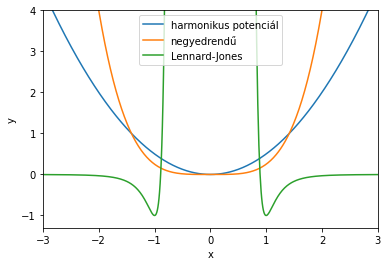

In [8]:
pylab.plot(xx, y10, label='harmonikus potenciál')
pylab.plot(xx, y20, label='negyedrendű')
pylab.plot(xx, y30, label='Lennard-Jones')


pylab.axis([-3, 3, -1.3, 4])
pylab.xlabel('x')
pylab.ylabel('y')
pici=minhely.index(min(minhely))
print(pici)
pylab.legend()

In [9]:
xx2 = []
y102 = []
y202 = []
y302 = []
for i in range(-1000,1000):
    xx2.append(i / 100.0)
    y102.append(float(Fharm(i/100.0)))
    y202.append(float(Fanharm(i/100.0)))
    y302.append(float(Flen(i/100.0)))

pylab.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

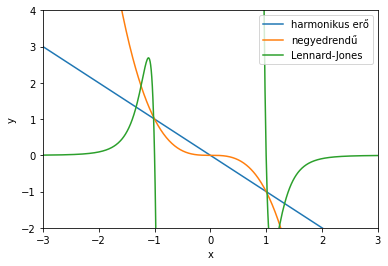

In [10]:
pylab.plot(xx2, y102, label='harmonikus erő')
pylab.plot(xx2, y202, label='negyedrendű')
pylab.plot(xx2, y302, label='Lennard-Jones')


pylab.axis([-3, 3, -2, 4])
pylab.xlabel('x')
pylab.ylabel('y')

pylab.legend()

In [11]:
ivl=Interval(0,2)
minimumhely=minimum(hx2,z,ivl)
print(minimumhely)

-1


In [12]:
xx3 = []
y303 = []
y203 = []
y204=[]
xx4=[]
for i in range(-1000,1000):
    xx4.append(i / 100.0)
    y203.append(float(harmo((i/100.0)+minimumhely)))
    y303.append(float(anharmo((i/100.0)+minimumhely)))
    y204.append(float(Lennard(i/100.0)))
pylab.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

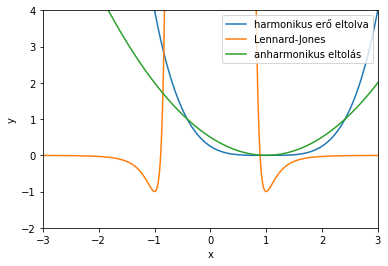

In [13]:
pylab.plot(xx4, y303, label='harmonikus erő eltolva')
pylab.plot(xx4, y204, label='Lennard-Jones')
pylab.plot(xx4, y203, label='anharmonikus eltolás')

pylab.axis([-3, 3, -2, 4])
pylab.xlabel('x')
pylab.ylabel('y')

pylab.legend()

## Alap 2. feladatrész

Integráljuk a fentiek közül kettő rendszer, mégpedig a harmonikus és a Lennard-Jones potenciállal meghatározott oszcillátorok mozgásegyenletét a python scipy.integrate.RK45 csomagjának használatával! Ez egy adaptív Runge-Kutta eljárás, azaz a léptetés nagyságát hibabecslés alapján állítja be. 


### a)
Első lépésként írjuk fel  a mozgást leíró másodrendű differenciálegyenletet mindkét potenciál esetén elsőrendű differenciálegyenletek rendszereként!
Ezután írjunk mindkét oszcillátorra egy-egy függvényt, amely a differenciálegyenlet rendszer jobb oldalán levő függvények
neki megadott idő és állapot melletti értékeit visszaadja egy-egy tömbben!


### b)
Ábrázoljuk a harmonikus és a Lennard-Jones potenciállal rendelkező rendszerek változóinak időfejlődését, a teljes energiát és a lépéshosszt  a scipy.integrate.RK45  adaptív  Runge-Kutta eljárás felhasználásával!

Azt várjuk, hogy az  idő függvényében oszcilláló mozgást kapunk, ezért néhány periódus hosszan futtassuk az integrálást!  Mutassuk ki, hogy a  Lennard-Jones potenciál esetén  a lépéshossz jelentősen változik időben! Van-e lényeges lépéshossz változás a harmonikus oszcillátornál is?

Egy kis segítség: a Lennard-Jones potenciál esetén indítsuk a rendszert az egyensúlyi helyzetből pozitív irányban $x_0/3$ értékkel kitérítve, kezdősebesség nélkül! 


A scipy.integrate.RK45 használata sokban hasonlít a fiznum1-ből tanult odeint használatához, azonban van néhány fontos különbség is. Egy részletesen kidolgozott egyszerű példát megtalálhatnak a fiznum2.public mappában (RK45-példa.ipynb), vagy letölthetik a gyakorlat honlapjáról, itt csak a leglényegesebb dolgokat foglaljuk össze röviden
(lásd még https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.RK45.html oldalt). 

Miután importáltuk a scipy.integrate csomagból az RK45-t, ilymódon tudjuk használni: 

rk45 = RK45( 'fun', 't0', 'y0', 't_bound', 'max_step=inf', 'rtol=0.001', 'atol=1e-06' )

Itt a 'fun' függvényt fentebb, az a) részben  definiáltuk, 't0' a kezdő időpont, 'y0' a kezdő állapot. 
'rtol' és 'atol' a megoldás relatív és abszolút pontosságát szabályozó paraméterek. A feladat megoldásakor 
a megfelelő pontosság eléréséhez az alapértelmezett rtol=0.001 értéket érdemes lecsökkenteni, pl  1e-5-re!  

Lényeges eltérés az odeint függvénytől, hogy az RK45 függvényhíváskor még csak egy objektumot kapunk eredményül. Ennek .step metódusát tudjuk az integrálási lépésekre használni, a .t, .y attribútumaiként pedig megkapjuk a változók értékeit. Tehát ha az RK45 eredményét a fentiek szerint eltároljuk, akkor a léptetés rk45.step() utasítással végezhető, az eredményeket pedig rk45.t, rk45.y értékeiként kapjuk meg.



In [14]:

from scipy.integrate import RK45


In [15]:
def len_jopot(t,y):
        m,x0,v0 = 1, 1, 1
        dx = y[1]
        dv = (12*(((x0**12/y[0]**13)-(x0**6/y[0]**7))))/m
        #dv=Flen(y[0])/m kéne működnie, de nem, szóval evvan
        return dx, dv
y_k = array([4/3,0.1])

In [16]:
atol=1e-7; rtol=1e-6 
N=300
rk=RK45(len_jopot,0,y_k,t_bound=100,max_step=inf,atol=atol,rtol=rtol)
t = []
y = []
step=[]
for i in range(N):
    t.append(rk.t)
    y.append(rk.y)
    step.append(rk.step_size)
    rk.step()
helyzet = array(y)[:,0] 
seb = array(y)[:,1]

E=[]
for k in range(N):
    E.append(0.5*seb[k]**2*m+Lennard(helyzet[k]))


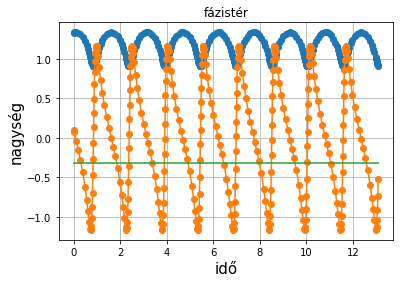

In [17]:
plt.plot(t,helyzet,"-o")
plt.plot(t,seb,"o-")
plt.plot(t,E)
plt.xlabel("idő",fontsize=15)
plt.ylabel("nagység",fontsize=15)
plt.title("fázistér")

plt.grid()

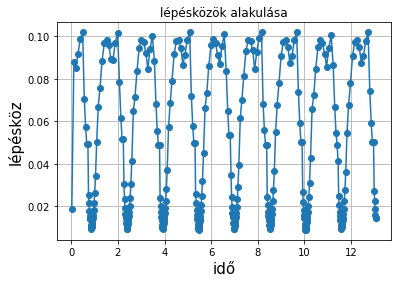

In [18]:
plt.plot(t,np.array(step),"o-")
plt.xlabel("idő",fontsize=15)
plt.ylabel("lépésköz",fontsize=15)
plt.title("lépésközök alakulása")
plt.grid()

In [19]:
def harm_pot(t,y):
        m,x0,v0 = 1, 1, 1
        dx = y[1]
        dv = -(y[0]/m) 
        return dx, dv
y_k2 = np.array([1,1])

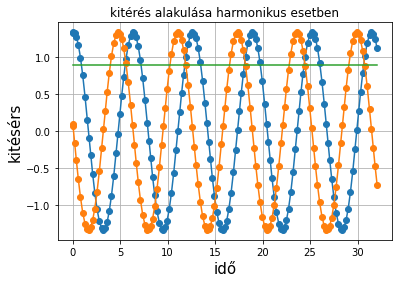

In [20]:
atol=1e-7; rtol=1e-6 
n=150
rk=RK45(harm_pot,0,y_k,t_bound=100,max_step=inf,atol=atol,rtol=rtol)
t2 = []
y2 = []
intervallumcucc=[]
for i in range(n):
        t2.append(rk.t)
        y2.append(rk.y)
        intervallumcucc.append(rk.step_size)
        rk.step()
helyzet2 = np.array(y2)[:,0] 
seb2 = np.array(y2)[:,1]
E2=[]
for k in range(n):
    E2.append(0.5*seb2[k]**2*m+harmo(helyzet2[k]))
plt.plot(t2,helyzet2,"o-")
plt.plot(t2,seb2,"o-")
plt.plot(t2,E2)
plt.xlabel("idő",fontsize=15)
plt.ylabel("kitésérs",fontsize=15)
plt.title("kitérés alakulása harmonikus esetben")
plt.grid()
#print(t)

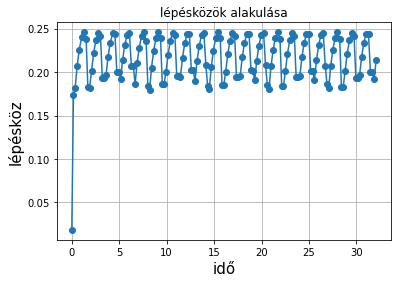

In [21]:
plt.plot(t2,np.array(intervallumcucc),"o-")
plt.xlabel("idő",fontsize=15)
plt.ylabel("lépésköz",fontsize=15)
plt.title("lépésközök alakulása")
plt.grid()

## Teljes 3. feladatrész

Vizsgáljuk a Lennard-Jones-potenciál esetén, hogy az adaptív, a nemadaptív Runge-Kutta és az Euler módszer hibája hogyan viszonyul egymáshoz, ha azonos lépésszámot próbálunk elérni! Mivel a rendszer energiája elméletileg konstans, az energiának a kezdeti értéktől való eltérését használhatjuk a hiba jelzésére, azt ábrázoljuk az idő függvényében néhány perióduson keresztül!

Az egyes léptetésekben az adaptív eljárással azonos, de ugyanakkor nem adaptív megoldást úgy tudunk létrehozni, hogy az RK45 eljárás használatakor a hibahatárokat (az atol és rtol nevű opcionális paramétereket) 0.1-re állítjuk, ekkor az a hibabecslése alapján viszonylag nagy lépéseket használna. Ugyanakkor a lépések nagyságát a max_step nevű opcionális paraméterrel korlátozva gyakorlatilag kikapcsoljuk a saját lépésköz szabályzását. Használjuk itt lépésköznek azt az értéket, amivel ugyanannyi lépés jön létre az eddig használt időintervallumon, mint amennyi az adaptív esetben volt!

Az Euler módszerre írjunk egyszerű for ciklust, vagy függvényt, amiben az előbbi lépésközt használjuk! Ábrázoljuk a három módszerrel az $x$ koordinátára kapott eredményeket egy ábrában, egy másikban pedig az energia megváltozását a kezdetihez képest. Amennyiben valamelyik eljárás nem adna oszcilláló megoldást, annál addig csökkentsük a lépésközt 10-ed, 100-ad részére, amíg oszcilláló lesz! Ha pedig az energiaváltozás ábráján nem látszik egyszerre a 3 esetben az energiaváltozás, akkor használjunk logaritmikus skálát.

nem akartam visszamenni máshogy megcsinálni, szóval azért van itt definiálva energia, pedig a 2-eshez is kellett már

In [22]:
def EN(x,v):
    return(0.5*m*v**2+Lennard(x))

forrásmegjelölés be Like:
https://youtu.be/C_WsQeOjbV4  

In [23]:
DE0=[]
for h in range(len(E)):
    DE0.append(E[h]-E[0])

In [24]:
atol=1e-1; rtol=1e-1
M=2000
rk=RK45(len_jopot,0,y_k,t_bound=1000,max_step=0.05,atol=atol,rtol=rtol)
t3 = []
y3 = []
step=[]
for i in range(M):
        t3.append(rk.t)
        y3.append(rk.y)
        step.append(rk.step_size)
        rk.step()
helyzet3 = np.array(y3)[:,0] 
seb3 = np.array(y3)[:,1]

En1=EN(helyzet3,seb3)
De=[]
for k in range(M):
    De.append(En1[k]-En1[0])
#plot(t3,helyzet3,"o-")
#plot(t,helyzet,"o-")
#plot(t,seb,"o-")

#plot(t,np.array(step),"o-")

In [25]:
T_0 = 0
DT = 0.0005
ys_euler = [1]
xs_euler = [1]
y_euler = 1
t4 = T_0
ts=[T_0]
x0=1

xv0=[4/3,0]
for i in range(30000):
    xv0[1]+=DT*len_jopot(t,xv0)[1]
    xv0[0]+=DT*xv0[1]
    t4+=DT
    xs_euler.append(xv0[0])
    ys_euler.append(xv0[1])
    ts.append(t4)



In [26]:
E2=EN(array(xs_euler),array(ys_euler))
De2=[]
for k in range(len(ts)-1):
    De2.append(E2[k]-E2[0])

In [27]:
print(De[0])

0


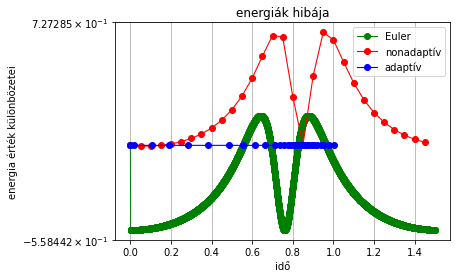

In [28]:
plt.plot(ts[0:3000], De2[0:3000], color='green', marker='o', linewidth=1, label='Euler')
plt.plot(t3[0:30],De[0:30],color='red', marker='o', linewidth=1.1, label='nonadaptív')
plt.plot(t[0:30],DE0[0:30],color='blue', marker='o', linewidth=1.1, label='adaptív')

plt.title('energiák hibája')
plt.yscale('symlog')
plt.ylabel('energia érték különbözetei')
plt.xlabel('idő')
plt.legend()
plt.grid()
plt.show()

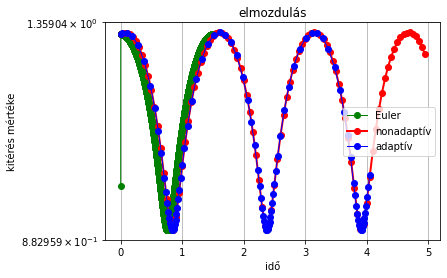

In [29]:
plt.plot(ts[0:3000], xs_euler[0:3000], color='green', marker='o', linewidth=1, label='Euler')
plt.plot(t3[0:100],helyzet3[0:100],color='red', marker='o', linewidth=2, label='nonadaptív')
plt.plot(t[0:100],helyzet[0:100],color='blue', marker='o', linewidth=1, label='adaptív')
plt.yscale('symlog')
plt.title('elmozdulás')
plt.ylabel('kitérés mértéke')
plt.xlabel('idő')
plt.legend()
plt.grid()
plt.show()

In [30]:
# adaptív, nonadaptív, Euler hiba öszehasonlítása az energia értékének változásában

## Teljes 4.a) feladatrész

A következő feladatrészben Fourier spektrumot kell számolnunk, amit közvetlenül csak időben egyenletes lépésközű adatokon kaphatunk meg. Az adaptív lépésközű integrálás bár hasznos, azonban a koordináta értékek nem egyenletes lépésközzel adódtak ki. Ezért interpoláljuk a 3. feladatrészből kapott megoldásokat időben egyenletes lépésközzel, lineárisan és köbös spline-ok segítségével!

Az interpolációhoz a scipy.interpolate csomag interp1d() függvényének használata javasolt.
Ha van egy t listában, vagy arrayben tárolt időpont sorozatunk és egy y listában/arrayben a hozzájuk tartozó függvényértékek, akkor ezekhez az alábbi módon tudunk interpolációt végezni:

ill=interp1d(t,y)

Az eredmény még nem adatsor lesz, hanem egy függvény, amit ill(t1) módon meghívva kapjuk az illesztett függvény értékeit. Alapból az illesztés lineáris, tehát a beadott adatsorok értékeiből alkotott szakaszonként egyenes függvény t1-nél felvett értékét kapjuk meg. A 'cubic' opciót az interp1d-ben megadva az illesztés köbös lesz.
Az eredményül kapott ill függvénynek, mint legtöbb python függvénynek egyszerre több értéket is adhatunk egy listában, vagy arrayben.

Hasonlítsuk össze a lineáris és köbös illesztés eredményét!

In [31]:
from scipy.interpolate import interp1d

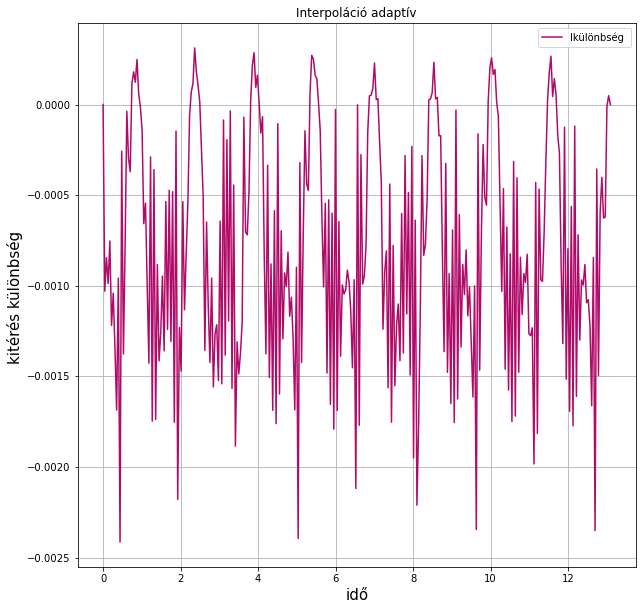

In [32]:
xnew = np.linspace(0,t[-1],len(t))
int1 = interp1d(t,helyzet,kind='linear') # lineáris interpoláció
x_11 = int1(xnew)

int2 = interp1d(t,helyzet,kind='cubic') # köbös interpoláció
x_12 = int2(xnew)

plt.figure(figsize=(10,10))
plt.plot(xnew,x_11-x_12,color="#B00B69",label="lkülönbség ")
#plt.plot(xnew,x_12,color="blue",label="köbös ")
plt.xlabel("idő",fontsize=15)
plt.ylabel("kitérés különbség ",fontsize=15)
plt.title("Interpoláció adaptív")
plt.legend(loc="upper right")
plt.grid()

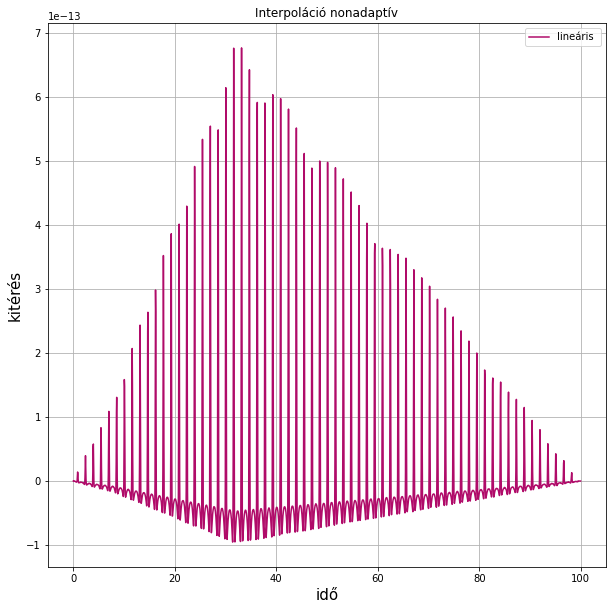

In [33]:
xnew2 = np.linspace(0,t3[-1],len(t3))
int3 = interp1d(t3,helyzet3,kind='linear') # lineáris interpoláció
x_13 = int3(xnew2)

int4 = interp1d(t3,helyzet3,kind='cubic') # köbös interpoláció
x_14 = int4(xnew2)

plt.figure(figsize=(10,10))
plt.plot(xnew2,x_13-x_14,color="#B00B69",label="lineáris ")
#plt.plot(xnew2[0:100],x_14[0:100],color="blue",label="köbös ")
plt.xlabel("idő",fontsize=15)
plt.ylabel("kitérés",fontsize=15)
plt.title("Interpoláció nonadaptív")
plt.legend(loc="upper right")
plt.grid()

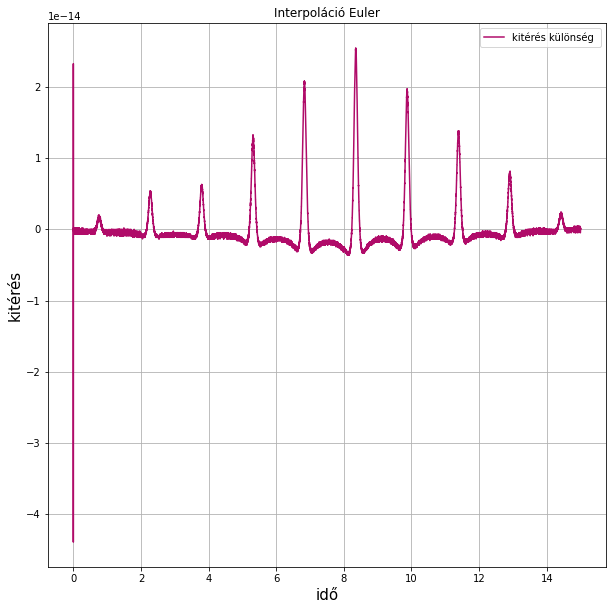

In [34]:
xnew3 = np.linspace(0,ts[-1],len(ts))
int5 = interp1d(ts,xs_euler,kind='linear') # lineáris interpoláció
x_15 = int5(xnew3)

int6 = interp1d(ts,xs_euler,kind='cubic') # köbös interpoláció
x_16 = int6(xnew3)

plt.figure(figsize=(10,10))
plt.plot(ts,x_15-x_16,color="#B00B69",label="kitérés különség ")
#plt.plot(t3[0:100],x_14[0:100],color="blue",label="köbös ")
plt.xlabel("idő",fontsize=15)
plt.ylabel("kitérés",fontsize=15)
plt.title("Interpoláció Euler")
plt.legend(loc="upper right")
plt.grid()

## Teljes 4.b) feladatrész

Számítsuk ki, és ábrázoljuk a felprogramozott oszcillátorok Fourier-spektrumát! Mivel valós a jelünk, ehhez javasolt az rfft() és rfftfreq() függvények használata. Mit figyelhetünk meg? Próbáljuk elérni, hogy az alapharmónikusnak megfelelő csúcs félértékszélessége legfeljebb a hozzá tartozó frekvenciaérték 2%-a körül legyen. Nyilván ehhez el kell érni, hogy a frekvenciaskála lépésköze legfeljebb e frekvencia 1%-a körül legyen. Ehhez elegendő hosszan kell a rendszer megoldását futtatni. Ugyanakkor vigyázzunk, mert ha túl hosszan futtatjuk és halmozódnak a hibák (észrevehetően változik az amplitúdó), az is a csúcsok kiszélesedéséhez vezethet!

God bless Oroszlány jegyzet

In [35]:
# a megoldás helye
from numpy.fft import *              # Fourier-analízishez használt rutinok
from scipy.signal import spectrogram

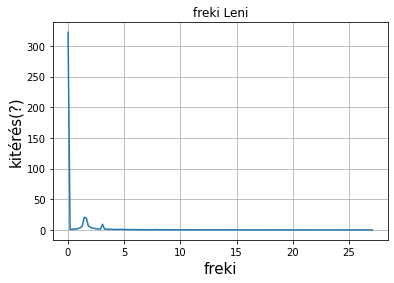

In [36]:
Fjel=rfft(helyzet)
freq = rfftfreq(len(t),t[1]-t[0])
plt.plot(freq,abs(Fjel))
plt.xlabel("freki",fontsize=15)
plt.ylabel("kitérés(?)",fontsize=15)
plt.title("freki Leni")
plt.grid()

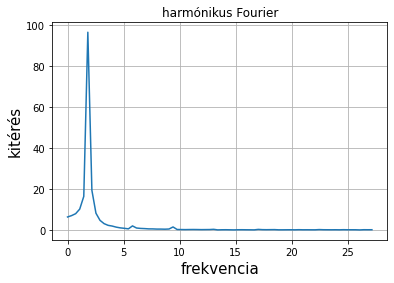

In [37]:
Fjel2=rfft(helyzet2)
freq2 = rfftfreq(len(t2),t2[1]-t2[0])
plt.plot(freq2,abs(Fjel2))
plt.xlabel("frekvencia",fontsize=15)
plt.ylabel("kitérés",fontsize=15)
plt.title("harmónikus Fourier")

plt.grid()

## <font color='green5'>5. Szorgalmi feladatrész</font>

Programozzunk be kaotikus oszcillátort!$^1$ Egy szinuszosan gerjesztett oszcillátor esetében a kaotikus viselkedés feltétele, hogy a visszatérítő erő ne lineáris függvénye legyen a kitérésnek. Ábrázoljuk a kitérés és a sebesség időfüggését, valamint a teljesítményspektrumot! Futassuk az integrálást legalább 1 millió lépésig, és ábrázoljuk a rendszer Poincaré-metszetét, azaz a sebességet a kitérés függvényében az $\omega t = n \cdot 2 \pi, n = 1, 2, 3, ... $ feltétel mellett!

$^1$ http://sprott.physics.wisc.edu/pubs/paper265.pdf

Elemi káoszelmélet yaayyy

In [38]:
# a megoldás helye
%pylab inline
from scipy.integrate import *
from mpl_toolkits.mplot3d import *
from tqdm.auto import tqdm

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['zeros', 'tan', 'sin', 'cosh', 'step', 'sinh', 're', 'take', 'reshape', 'plot', 'exp', 'beta', 'vectorize', 'tanh', 'cbrt', 'floor', 'maximum', 'diff', 'partition', 'gcd', 'roots', 'sinc', 'product', 'nan', 'fft', 'Circle', 'prod', 'test', 'lcm', 'eye', 'var', 'invert', 'sqrt', 'cos', 'plotting', 'det', 'iterable', 'Line2D', 'shape', 'solve', 'binomial', 'minimum', 'sign', 'interactive', 'diag', 'Number', 'flatten', 'trace', 'Polygon', 'poly', 'source', 'transpose', 'conjugate', 'pi', 'trapz', 'seterr', 'ones', 'trunc', 'pylab', 'gamma', 'log']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


x_0 és V_0 ha nem 50-50,hanem 1000-1000  akkor fog lefutni 1 millióra, de azt írta úgy nekem hogy 16 óra... 

  0%|          | 0/2500 [00:00<?, ?it/s]

2500


(-2.5, 2.5)

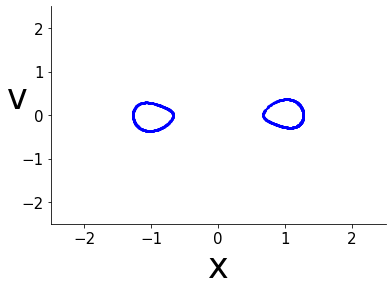

In [40]:
epsilon = 0.3
beta = 0.3
a = 1
b = 1
omega = 1
def Duffing(u, t):
    x = u[0]
    v = u[1]
    return [v, a*x - b*x**3 - 2*beta*v + epsilon*sin(omega*t)]


t = [0, 50*2*pi/omega] # time step
X_0 = linspace(-1,1,50) # ide kéne 1000,1000 adat, hogy 1 millió legyen
V_0 = linspace(-1,1,50)
X0 = []; V0 = []
for i in range(len(X_0)):
    for j in range(len(V_0)):
        X0.append(X_0[i])
        V0.append(V_0[j])

X = []; V = []
err = 0
if len(t) != 0:
    for i in tqdm(range(len(X0))):
        U0 = [X0[i], V0[i]]
        U,info = odeint(Duffing, U0, t, full_output=True, rtol=1e-10, atol=1e-10, mxstep=1000)
        if info['message'] != 'Integration successful.':
            err += 1
        X.append(U[-1,0]); V.append(U[-1,1])
if err != 0:
    print(err)
    

fig,ax = subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
    
if len(t) == 0:
    plot(X0, V0, 'bo', ms=5)
else:
    plot(X, V, 'bo', ms=1);

xticks(fontsize=15)
yticks(fontsize=15)
xlabel(r'x', fontsize=35)
ylabel(r'v', rotation=0, fontsize=35);
xlim(-2.5,2.5); ylim(-2.5,2.5)

legközelebb lehet nem ennyi könyvtárat kéne megnyitnom, és akkor nem lenne ennyire csúnya. Párszor belekeveredtem ezért inkább újrahívtam, ami nemtudom miért tűnt jó ötletnek